In [1]:
%matplotlib widget

import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
CMS = {
    "font.sans-serif": ["TeX Gyre Heros", "Helvetica", "Arial"],
    "font.family": "sans-serif",
    "mathtext.fontset": "custom",
    "mathtext.rm": "TeX Gyre Heros",
    "mathtext.bf": "TeX Gyre Heros:bold",
    "mathtext.sf": "TeX Gyre Heros",
    "mathtext.it": "TeX Gyre Heros:italic",
    "mathtext.tt": "TeX Gyre Heros",
    "mathtext.cal": "TeX Gyre Heros",
    "mathtext.default": "regular",
    "figure.figsize": (10.0, 10.0),
    "font.size": 26,
    "axes.labelsize": "medium",
    "axes.unicode_minus": False,
    "xtick.labelsize": "small",
    "ytick.labelsize": "small",
    "legend.fontsize": "small",
    "legend.handlelength": 1.5,
    "legend.borderpad": 0.5,
    "legend.frameon": False,
    "xtick.direction": "in",
    "xtick.major.size": 12,
    "xtick.minor.size": 6,
    "xtick.major.pad": 6,
    "xtick.top": True,
    "xtick.major.top": True,
    "xtick.major.bottom": True,
    "xtick.minor.top": True,
    "xtick.minor.bottom": True,
    "xtick.minor.visible": True,
    "ytick.direction": "in",
    "ytick.major.size": 12,
    "ytick.minor.size": 6.0,
    "ytick.right": True,
    "ytick.major.left": True,
    "ytick.major.right": True,
    "ytick.minor.left": True,
    "ytick.minor.right": True,
    "ytick.minor.visible": True,
    "grid.alpha": 0.8,
    "grid.linestyle": ":",
    "axes.linewidth": 2,
    "savefig.transparent": False,
    "xaxis.labellocation": "right",
    "yaxis.labellocation": "top",
}

plt.style.use(CMS)

In [3]:
# One can bound figure attributes to other widget values.
from ipywidgets import AppLayout, FloatSlider, Text
from ipywidgets import Button, HBox, VBox
from functools import partial

plt.ioff()

colors = [matplotlib.colors.to_hex(c) for c in plt.cm.tab10.colors]

fields = [Text(value=colors[i], placeholder='name or #HEX', description=f'Color{i}:', disabled=False) for i in range(8)]
N = 2
field_array = HBox([VBox(list(chunk)) for chunk in np.array(fields).reshape(N, int(len(fields)/N))])

# text = Text(
#     value='black',
#     placeholder='Type something',
#     description='Color1:',
#     disabled=False   
# )


# slider.layout.margin = '0px 30% 0px 30%'
# slider.layout.width = '40%'

# fig, ax = plt.subplots()
# fig.canvas.header_visible = False
# fig.canvas.layout.min_height = '400px'
# plt.title('Plotting: y=sin({} * x)'.format(slider.value))

fig, ax = plt.subplots()
bins = np.linspace(0, 10, 41)

h0, _ = np.histogram(np.random.normal(-2, 5, 1000000), bins=bins)
hs = [np.histogram(np.random.normal(i, 1, 100000), bins=bins)[0] for i in [2,3,4,5,8]]
hall = [h0] + hs
hbase = np.cumsum(hall, axis=0) - hall

arts = [ax.stairs(hbase[i]+hall[i], baseline=hbase[i], fill=True, color=c) for i, c in zip(range(len(hall)), colors)]
art_dat = plt.errorbar((np.arange(len(h0))+0.5), np.random.poisson(np.sum(hall, axis=0)), color='black', fmt='o', markersize=5, 
                       yerr=np.sqrt(20*np.random.poisson(np.sum(hall, axis=0))), capsize=2)
ax.set_xlim(0, 40)

def update_artist(art, change):
    art.set_color(change.new)
    fig.canvas.draw()
    fig.canvas.flush_events()

for art, text in zip(arts, fields):
    update_specific = partial(update_artist, art)
    text.observe(update_specific, names='value')

AppLayout(
    center=fig.canvas,
    footer=field_array,
    pane_heights=[0, 6, 1]
)

AppLayout(children=(HBox(children=(VBox(children=(Text(value='#1f77b4', description='Color0:', placeholder='na…

In [2]:
import uproot
import hist
import mplhep as hep

from ipywidgets import AppLayout, FloatSlider, Text
from ipywidgets import Button, HBox, VBox
from functools import partial

In [23]:
f = uproot.open('Histogram1D.root')
hall = [f[th].to_hist() for th in f.keys()]
hdata = hall[0]
hs = hall[1:]+[hall[-1]]

plt.ioff()
hep.style.use("CMS")
colors = [matplotlib.colors.to_hex(c) for c in plt.cm.tab10.colors]
fields = [Text(value=colors[i], placeholder='name or #HEX', description=f'Color{i}:', disabled=False) for i in range(8)]
N = 2
field_array = HBox([VBox(list(chunk)) for chunk in np.array(fields).reshape(N, int(len(fields)/N))])

fig, ax = plt.subplots()
hep.cms.label("Preliminary", data=True)
hep.histplot(hdata, histtype='errorbar', color='black')
arts = hep.histplot(hs, stack=True, histtype='fill', label=colors);
ax.set_xlim(60, 400)
ax.set_ylim(100, None)
ax.set_xlabel("$m_{4l}$")
ax.set_ylabel("Events")
ax.semilogy()
leg = ax.legend(ncol=2)

def update_artist(art, change):
    art.set_color(change.new)
    art.set_label(f"change.new")
    ax.legend()
    fig.canvas.draw()
    fig.canvas.flush_events()

for art, text in zip(arts, fields):
    update_specific = partial(update_artist, art.stairs)
    text.observe(update_specific, names='value')

AppLayout(
    center=fig.canvas,
    footer=field_array,
    pane_heights=[0, 6, 1]
)


AppLayout(children=(HBox(children=(VBox(children=(Text(value='#1f77b4', description='Color0:', placeholder='na…

In [10]:
h, l = ax.get_legend_handles_labels()

In [20]:
arts[0].stairs.set_label("X")

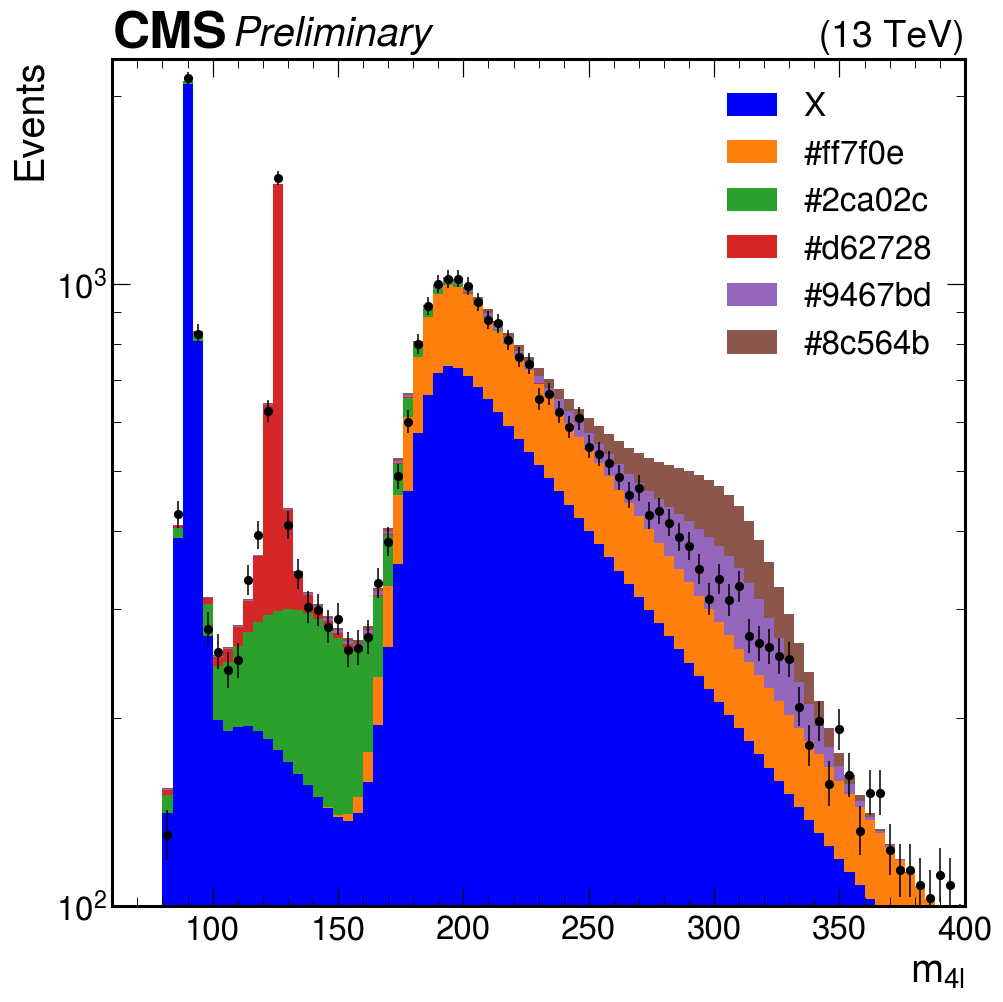

In [22]:
ax.legend()
fig

In [ ]:
ax.legend()
fig